In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [15]:
df = pd.read_csv("../data/train.csv")

C:\Users\jessi\AppData\Local\Temp\ipykernel_42620\3828657111.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/train.csv")


In [16]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [18]:
print("Number of customers: ", len(df['Customer_ID'].unique()))

Number of customers:  12500


#### Looking at only one customer

In [21]:
cust_df = df[df['Customer_ID'] == "CUS_0xd40"]
cust_df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard


In [55]:
cust_df[['Customer_ID','Interest_Rate']]

,Customer_ID,Interest_Rate
0,CUS_0xd40,3
1,CUS_0xd40,3
2,CUS_0xd40,3
3,CUS_0xd40,3
4,CUS_0xd40,3
5,CUS_0xd40,3
6,CUS_0xd40,3
7,CUS_0xd40,3


#### Checking values for each column

##### Occupation

In [125]:
df['Occupation'].unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

##### Annual Income

In [126]:
df['Annual_Income'].unique()

array(['19114.12', '34847.84', '34847.84_', ..., '20002.88', '39628.99',
       '39628.99_'], shape=(18940,), dtype=object)

##### Monthly salary

In [127]:
df['Monthly_Inhand_Salary'].unique()

array([1824.84333333,           nan, 3037.98666667, ..., 3097.00833333,
       1929.90666667, 3359.41583333], shape=(13236,))

##### Number of bank accounts

In [128]:
df['Num_Bank_Accounts'].unique()

array([   3,    2,    1,    7,    4,    0,    8,    5,    6,    9,   10,
       1414, 1231,   67,  572, 1488,   91,  528, 1647, 1696, 1338,  649,
        889, 1668,  685,  857,  975, 1496, 1534, 1620,   37, 1388, 1429,
       1332, 1588,  120, 1777, 1096,  803,  494,  744, 1139,  831, 1613,
        741,  121,  665, 1748, 1644,  823, 1356, 1651,   87,  711,  450,
        210, 1671, 1722,  648,  672, 1662, 1495,  510,  666,  429, 1131,
       1434,  980, 1026,  526,  718, 1300, 1312, 1315,  501, 1566,  480,
       1042,  322,  628, 1016,  333, 1265,  791,  427,  563,  905, 1190,
       1036, 1611,   38,  619,  555, 1769,  280,  752, 1201,  812, 1487,
        222,  212, 1019, 1222,  610, 1714, 1308,  525, 1158, 1115, 1616,
        754, 1601,  797, 1577,  521,  703,  933,  959,  809, 1089, 1656,
       1113, 1715,  964, 1533, 1789,  871,  434, 1295,  565, 1724,  603,
        677,  541,  698, 1101,  464, 1539, 1462, 1011, 1257, 1727,   45,
        244, 1266,  897,  535,  484,  331,  675,  8

##### Number of credit cards

In [37]:
# Represents the number of other credit cards held by a person
df['Num_Credit_Card'].unique()

array([   4, 1385,    5, ...,  955, 1430,  679], shape=(1179,))

##### Interest Rate

In [72]:
# Represents the interest rate on credit card
df['Interest_Rate'].describe()

count    100000.000000
mean         72.466040
std         466.422621
min           1.000000
25%           8.000000
50%          13.000000
75%          20.000000
max        5797.000000
Name: Interest_Rate, dtype: float64

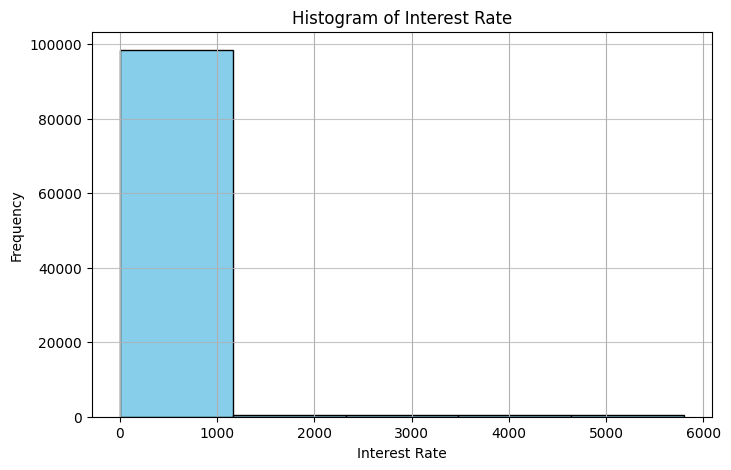

In [77]:
''' Credit card APRs are usually between 10% and 60% worldwide. I have no information on what type
is the data on this column (% or basis points). I'm going to assume is %. 
Some numbers weren't making too much sense (such as 5797), so i'm initially taking them away
to see the dataset behavior '''

plt.figure(figsize=(8, 5))
df["Interest_Rate"].hist(bins=5, color='skyblue', edgecolor='black')
plt.title('Histogram of Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

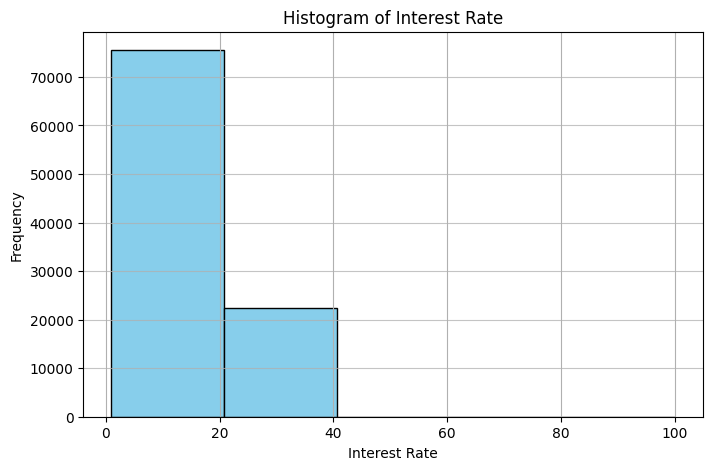

In [78]:
df_temp = df[df["Interest_Rate"].between(0, 100)]

plt.figure(figsize=(8, 5))
df_temp["Interest_Rate"].hist(bins=5, color='skyblue', edgecolor='black')
plt.title('Histogram of Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [84]:
print("Number of elements: ", len(df_temp['Customer_ID'].unique()))

Number of elements:  12500


##### Number of Loans

In [111]:
# Represents the number of loans taken from the bank
df['Num_of_Loan'].unique()

''' Many numbers have [-/_] at the beggining or end of the string. '''
df_copy = df.copy()
df_copy['Num_of_Loan'] = df_copy['Num_of_Loan'].apply(lambda x: x.replace('_','').replace('-',''))
# df_copy['Num_of_Loan'].unique()

##### Type of Loan

In [ ]:
# Represents the types of loan taken by a person
df['Type_of_Loan'].unique()

df_copy = df.copy()
df_copy['Type_of_Loan'] = df_copy['Type_of_Loan'].fillna('Not Specified')

def list_loans(x):
    return [word.strip().replace('and ','') for word in x.split(',')]

df_copy['Loans'] = df_copy['Type_of_Loan'].apply(lambda x: list_loans(x))

In [ ]:
''' Creating columns for each of the loans, so i can know exactly the distribution of loans per type '''
df_exploded = df_copy.explode("Loans")
dummies = pd.get_dummies(df_exploded["Loans"])
df_final = df_exploded[["ID"]].join(dummies).groupby("ID").sum().reset_index()

for col in df_final.columns:
    df_final.rename(columns={col:col.replace(' ','')},inplace=True)
df_final.drop("")

In [110]:
df_final

,ID,AutoLoan,Credit-BuilderLoan,DebtConsolidationLoan,HomeEquityLoan,MortgageLoan,NotSpecified,PaydayLoan,PersonalLoan,StudentLoan
0,0x10002,0,0,0,0,0,0,0,1,0
1,0x10003,0,0,0,0,0,0,0,1,0
2,0x10004,0,0,0,0,0,0,0,1,0
3,0x10005,0,0,0,0,0,0,0,1,0
4,0x10006,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
99995,0xfff9,7,0,7,7,0,0,14,0,14
99996,0xfffa,7,0,7,7,0,0,14,0,14
99997,0xfffb,7,0,7,7,0,0,14,0,14
99998,0xfffc,7,0,7,7,0,0,14,0,14


##### Average number of days delayed

In [113]:
# Represents the average number of days delayed from the payment date
''' Negative numbers may be from payments done before a particular due date '''

df['Delay_from_due_date'].unique()

array([ 3, -1,  5,  6,  8,  7, 13, 10,  0,  4,  9,  1, 12, 11, 30, 31, 34,
       27, 14,  2, -2, 16, 17, 15, 23, 22, 21, 18, 19, 52, 51, 48, 53, 26,
       43, 28, 25, 20, 47, 46, 49, 24, 61, 29, 50, 58, 45, 59, 55, 56, 57,
       54, 62, 65, 64, 67, 36, 41, 33, 32, 39, 44, 42, 60, 35, 38, -3, 63,
       40, 37, -5, -4, 66])

##### Average number of delayed payments

In [115]:
# Represents the average number of payments delayed by a person
''' How many payments have a person delayed? '''
df['Num_of_Delayed_Payment'].unique()


''' Many numbers have [-/_] at the beggining or end of the string. '''
df_copy = df.copy()
df_copy['Num_of_Delayed_Payment'] = df_copy['Num_of_Delayed_Payment'].fillna('0')
df_copy['Num_of_Delayed_Payment'] = df_copy['Num_of_Delayed_Payment'].apply(lambda x: x.replace('_',''))
df_copy['Num_of_Delayed_Payment'].unique()

array(['7', '0', '4', '8', '6', '1', '-1', '3', '5', '9', '12', '15',
       '17', '10', '2', '11', '14', '20', '22', '13', '16', '18', '19',
       '23', '24', '21', '3318', '3083', '1338', '26', '3104', '25',
       '183', '1106', '834', '2672', '2008', '-3', '538', '27', '-2',
       '3478', '2420', '707', '708', '3815', '28', '1867', '2250', '1463',
       '4126', '2882', '1941', '2655', '2628', '132', '3069', '306',
       '3539', '3684', '1823', '4128', '1946', '827', '2297', '2566',
       '904', '182', '929', '3568', '2503', '1552', '2812', '1697',
       '3764', '851', '3905', '923', '88', '1668', '3253', '808', '2689',
       '3858', '642', '3457', '1402', '1732', '3154', '847', '3037',
       '2204', '3103', '1063', '2056', '1282', '1841', '2569', '211',
       '793', '3484', '411', '3491', '2072', '3050', '1049', '2162',
       '3402', '2753', '1718', '1014', '3260', '3855', '84', '2311',
       '3251', '1832', '4069', '3010', '733', '4241', '166', '2461',
       '1749', '3

##### Percentage change in credit card limit

In [116]:
# Represents the percentage change in credit card limit
df['Changed_Credit_Limit'].unique()

df_copy = df.copy()
df_copy['Changed_Credit_Limit'] = df_copy['Changed_Credit_Limit'].fillna('0')
df_copy['Changed_Credit_Limit'] = df_copy['Changed_Credit_Limit'].apply(lambda x: x.replace('_',''))
df_copy['Changed_Credit_Limit'].unique()

array(['11.27', '', '6.27', ..., '17.509999999999998', '25.16', '21.17'],
      shape=(4384,), dtype=object)

##### Number of credt card inquiries

In [119]:
# Represents the number of credit card inquiries
df['Num_Credit_Inquiries'].unique()
null_values = df['Num_Credit_Inquiries'].isnull().sum()
print(f"Number of null values: {null_values}")

Number of null values: 1965


##### Classification of the mix of credits

In [45]:
# Represents the classification of the mix of credits
df['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

##### Remaining debt to be paid

In [120]:
# Represents the remaining debt to be paid (in USD)
df['Outstanding_Debt'].unique()

df_copy = df.copy()
df_copy['Changed_Credit_Limit'] = df_copy['Changed_Credit_Limit'].apply(lambda x: x.replace('_',''))
df_copy['Changed_Credit_Limit'].unique()

array(['11.27', '', '6.27', ..., '17.509999999999998', '25.16', '21.17'],
      shape=(4384,), dtype=object)

##### Utilization ratio of credit card

In [121]:
# Represents the utilization ratio of credit card
df['Credit_Utilization_Ratio'].unique()

array([26.82261962, 31.94496006, 28.60935202, ..., 41.25552226,
       33.63820798, 34.19246265], shape=(100000,))

##### Age of credit history

In [124]:
# Represents the age of credit history of the person
df['Credit_History_Age'].unique()

def number_of_months(x):
    if pd.isna(x):
        return None
    years = re.search(r"(\d+)\s*Year", x)
    months = re.search(r"(\d+)\s*Month", x)
    y = int(years.group(1)) if years else 0
    m = int(months.group(1)) if months else 0
    return y * 12 + m

df_copy = df.copy()
df_copy['Credit_History_Age_Months'] = df_copy['Credit_History_Age'].apply(lambda x: number_of_months(x))
df_copy['Credit_History_Age_Months'].unique()

array([265.,  nan, 267., 268., 269., 270., 271., 319., 320., 321., 322.,
       323., 324., 325., 326., 213., 214., 215., 217., 218., 219., 220.,
       207., 208., 209., 210., 211., 212., 368., 369., 370., 371., 372.,
       373., 374., 375., 384., 386., 387., 389., 390., 367., 176., 177.,
       178., 179., 180., 181., 182., 256., 257., 258., 259., 260., 261.,
       262., 263., 318., 230., 231., 232., 233., 234., 235., 236., 305.,
       306., 307., 308., 309., 310., 311., 312., 327., 328., 329., 107.,
       108., 109., 110., 111., 112., 114., 221., 222., 224., 225., 202.,
       203., 204., 205., 206., 350., 351., 352., 354., 356., 357.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84., 330., 331., 332., 333.,
       223., 237., 238., 121., 122., 123., 124., 125., 126., 127., 128.,
       393., 394., 395., 396., 397., 400., 147., 148., 149., 150., 151.,
       152., 154., 153., 164., 167., 168., 169., 170., 171., 363., 364.,
       365., 366., 105., 106., 226., 227., 228., 22

##### Minimum amount was paid by the person

In [49]:
# Represents whether only the minimum amount was paid by the person
df['Payment_of_Min_Amount'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

##### Monthly EMI payments

In [50]:
# Represents the monthly EMI payments (in USD)
df['Total_EMI_per_month'].unique()

array([4.95749492e+01, 1.88162146e+01, 2.46992319e+02, ...,
       1.21120000e+04, 3.51040226e+01, 5.86380000e+04], shape=(14950,))

##### Monthly amount invested by the customer

In [51]:
# Represents the monthly amount invested by the customer (in USD)
df['Amount_invested_monthly'].unique()

array(['80.41529543900253', '118.28022162236736', '81.699521264648', ...,
       '24.02847744864441', '251.67258219721603', '167.1638651610451'],
      shape=(91050,), dtype=object)

##### Payment behavior

In [52]:
# Represents the payment behavior of the customer (in USD)
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

##### Monthly balance amount

In [53]:
# Represents the monthly balance amount of the customer (in USD)
df['Monthly_Balance'].unique()

array(['312.49408867943663', '284.62916249607184', '331.2098628537912',
       ..., 516.8090832742814, 319.1649785257098, 393.6736955618808],
      shape=(98793,), dtype=object)

##### Credit Score Brackets

In [54]:
# Represents the bracket of credit score (Poor, Standard, Good)
df['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)